# EXPLORATORY DATA ANALYSIS

IMPORT Library

In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression  # Gantilah dengan model yang sesuai
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Tentukan path direktori yang ingin Anda lihat
direktori_path = 'D:\Data\Board Games'

# Gunakan os.listdir() untuk mendapatkan daftar semua file di dalam direktori
daftar_file = os.listdir(direktori_path)

# Tampilkan daftar file
#print("Daftar File di", direktori_path)
#for file in daftar_file:
#   print(file)

pola_ekstensi = '*.csv'

# Gunakan glob.glob() untuk mendapatkan daftar file sesuai dengan pola ekstensi
daftar_file_txt = glob.glob(os.path.join(direktori_path, pola_ekstensi))

# Tampilkan daftar file dengan ekstensi tertentu
print("Daftar File dengan Ekstensi .csv di", direktori_path)
for file in daftar_file_txt:
    print(file)

Daftar File dengan Ekstensi .csv di D:\Data\Board Games
D:\Data\Board Games\details.csv
D:\Data\Board Games\ratings.csv


In [3]:
df_details = pd.read_csv('details.csv')
df_ratings = pd.read_csv('ratings.csv')

In [4]:
print(df_details.shape)
df_details.head()

(21631, 23)


,num,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,...,boardgamefamily,boardgameexpansion,boardgameimplementation,boardgamedesigner,boardgameartist,boardgamepublisher,owned,trading,wanting,wishing
0,0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,...,"['Components: Map (Global Scale)', 'Components...",['Pandemic: Gen Con 2016 Promos – Z-Force Team...,"['Pandemic Legacy: Season 0', 'Pandemic Legacy...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",168364,2508,625,9344
1,1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,...,"['Cities: Carcassonne (France)', 'Components: ...","['20 Jahre Darmstadt Spielt', 'Apothecaries (f...","['The Ark of the Covenant', 'Carcassonne für 2...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",161299,1716,582,7383
2,2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,...,"['Animals: Sheep', 'Components: Hexagonal Tile...","['20 Jahre Darmstadt Spielt', 'Brettspiel Adve...","['Baden-Württemberg Catan', 'Catan Geographies...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",167733,2018,485,5890
3,3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,30,...,"['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...","['7 Wonders: Armada', '7 Wonders: Babel', '7 W...","['7 Wonders (Second Edition)', '7 Wonders Duel...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",120466,1567,1010,12105
4,4,36218,Dominion,"&quot;You are a monarch, like your parents bef...",2008,2,4,30,30,30,...,"['Crowdfunding: Wspieram', 'Game: Dominion', '...","['Ancient Times (fan expansion for Dominion)',...","['Dominion (Second Edition)', 'Het Koninkrijk ...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",106956,2009,655,8621


In [5]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21631 entries, 0 to 21630
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   num                      21631 non-null  int64 
 1   id                       21631 non-null  int64 
 2   primary                  21631 non-null  object
 3   description              21630 non-null  object
 4   yearpublished            21631 non-null  int64 
 5   minplayers               21631 non-null  int64 
 6   maxplayers               21631 non-null  int64 
 7   playingtime              21631 non-null  int64 
 8   minplaytime              21631 non-null  int64 
 9   maxplaytime              21631 non-null  int64 
 10  minage                   21631 non-null  int64 
 11  boardgamecategory        21348 non-null  object
 12  boardgamemechanic        20041 non-null  object
 13  boardgamefamily          17870 non-null  object
 14  boardgameexpansion       5506 non-null

Drop features from details data frame with high null counts

In [6]:
# Drop features from details data frame with high null counts
df_details.drop(columns=['boardgameexpansion', 'boardgameimplementation'], inplace=True)

In [ ]:
df_details.isnull().sum() / len(df_details)

In [7]:
#drop features details that will not be used
df_details.drop(columns=['description','boardgamecategory','boardgamemechanic', 'boardgamefamily', 'boardgamedesigner', 'boardgameartist', 'boardgamepublisher'], inplace=True)

In [8]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21631 entries, 0 to 21630
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            21631 non-null  int64 
 1   id             21631 non-null  int64 
 2   primary        21631 non-null  object
 3   yearpublished  21631 non-null  int64 
 4   minplayers     21631 non-null  int64 
 5   maxplayers     21631 non-null  int64 
 6   playingtime    21631 non-null  int64 
 7   minplaytime    21631 non-null  int64 
 8   maxplaytime    21631 non-null  int64 
 9   minage         21631 non-null  int64 
 10  owned          21631 non-null  int64 
 11  trading        21631 non-null  int64 
 12  wanting        21631 non-null  int64 
 13  wishing        21631 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 2.3+ MB


In [9]:
df_details['num'].tail()

21626    21626
21627    21627
21628    21628
21629    21629
21630    21630
Name: num, dtype: int64

In [10]:
print(df_ratings.shape)
df_ratings.head()

(21831, 10)


,num,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


Drop high cardinality

In [8]:
#drop high cardinality
df_ratings.drop(columns=['url', 'thumbnail'], inplace=True)

In [12]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num            21831 non-null  int64  
 1   id             21831 non-null  int64  
 2   name           21831 non-null  object 
 3   year           21831 non-null  int64  
 4   rank           21831 non-null  int64  
 5   average        21831 non-null  float64
 6   bayes_average  21831 non-null  float64
 7   users_rated    21831 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


Merge 2 data frame into 1 data frame

In [9]:
#merge 2 data frame into 1 data frame
df = pd.merge(df_details, df_ratings, on='id')

In [10]:
df.head()

,num_x,id,primary,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,trading,wanting,wishing,num_y,name,year,rank,average,bayes_average,users_rated
0,0,30549,Pandemic,2008,2,4,45,45,45,8,...,2508,625,9344,105,Pandemic,2008,106,7.59,7.487,108975
1,1,822,Carcassonne,2000,2,5,45,30,45,7,...,1716,582,7383,189,Carcassonne,2000,190,7.42,7.309,108738
2,2,13,Catan,1995,3,4,120,60,120,10,...,2018,485,5890,428,Catan,1995,429,7.14,6.970,108024
3,3,68448,7 Wonders,2010,2,7,30,30,30,10,...,1567,1010,12105,72,7 Wonders,2010,73,7.74,7.634,89982
4,4,36218,Dominion,2008,2,4,30,30,30,13,...,2009,655,8621,103,Dominion,2008,104,7.61,7.499,81561


Tambahkan variabel target (populer atau tidak populer)

In [11]:
# Tambahkan variabel target (populer atau tidak populer)
threshold_rating = 6.5  # Ambil nilai rata-rata sebagai batas
df['is_popular'] = (df['average'] > threshold_rating).astype(int)

korelasi untuk tipe angka dalam bentuk heatmaps

<Axes: >

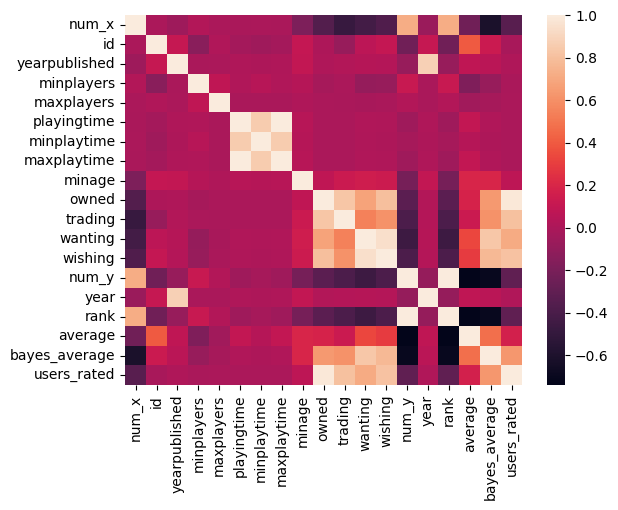

In [12]:
corr = df.select_dtypes("number").drop(columns = "is_popular").corr()
sns.heatmap(corr)

Drop any columns that would create issues of multicollinearity

In [13]:
#Drop any columns that would create issues of multicollinearity
df.drop(columns=['minplaytime', 'maxplaytime','trading','wanting', 'wishing'], inplace=True)

Drop any columns that would constitute leakage for the target

In [14]:
#Drop any columns that would constitute leakage for the target
df.drop(columns=['bayes_average'], inplace=True)

In [20]:
df.nunique()

num_x            21631
id               21631
primary          21236
yearpublished      190
minplayers          11
maxplayers          52
playingtime        119
minage              21
owned             4226
num_y            21631
name             21236
year               188
rank             21631
average            631
users_rated       3109
is_popular           2
dtype: int64

drop high cardinality

In [15]:
#drop high cardinality
df.drop(columns=['num_x', 'num_y', 'id'], inplace=True)

# Model

Define features and target variable

In [16]:
#Define features and target variable
features = ['average', 'users_rated', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minage', 'owned']
target = 'is_popular'

Split the data into training and testing sets

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

Standardize features (optional but can be beneficial for logistic regression)

In [18]:
# Standardize features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initialize and train the logistic regression model

In [19]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

Initialize KFold cross-validation

In [30]:
# Initialize KFold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

Perform cross-validation

In [31]:
# Perform cross-validation
scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

Make predictions on the test set

In [26]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

Evaluate the model

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Display the results

In [34]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')

Accuracy: 0.9995377859949156
Confusion Matrix:
 [[2355    0]
 [   2 1970]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2355
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      4327
   macro avg       1.00      1.00      1.00      4327
weighted avg       1.00      1.00      1.00      4327

Cross-Validation Scores: [0.99942213 0.99942213 0.9991332  0.99942213 0.99884393]
Mean Accuracy: 0.9992487052256941
